In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):#이 방법은 직관적이지만, 배열을 입력받고 출력할 수 없다.
    if x > 0:
        return 1
    else:
        return 0

In [3]:
x = np.array([-0.1, 0.1, 0.2])

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(np.int32)

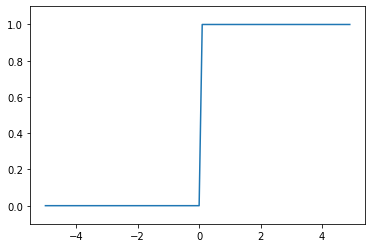

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

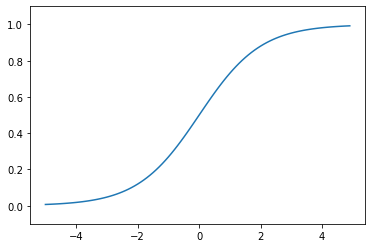

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

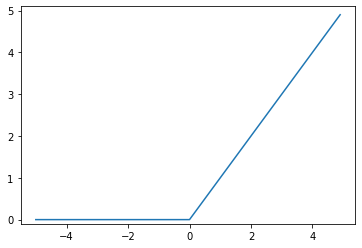

In [8]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,5.1)
plt.show()

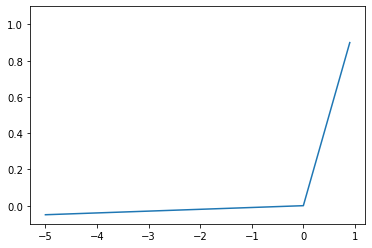

In [9]:
def leaky_relu(x):
    return np.maximum(0.01*x, x)

x = np.arange(-5.0, 1.0, 0.1)
y = leaky_relu(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

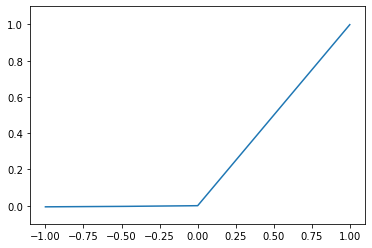

In [10]:
def ELU(x):
    return (x>0)*x + (x<=0)*(0.01*(np.exp(x)-1))

x = np.arange(-1.0, 1.0, 0.001)
y = ELU(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

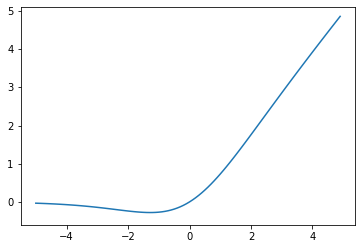

In [11]:
def swish(x):
    return x*sigmoid(x)

x = np.arange(-5.0, 5.0, 0.1)
y = swish(x)
plt.plot(x,y)
plt.ylim(-0.6,5.1)
plt.show()

In [12]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    identity_function = lambda x:x
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [13]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [14]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    return exp_x/sum_exp_x

In [15]:
import time
x = np.array([0.3, 2.9, 4.0])

start_time = time.time()
result = softmax(x)
end_time = time.time()
print('{:<15}'.format('softmax result'),":",result)
print('{:<15}'.format('operation time'),":",'{:.6f}'.format(end_time - start_time))

softmax result  : [0.01821127 0.24519181 0.73659691]
operation time  : 0.000000


In [16]:
x = np.array([1010, 1000, 990])

start_time = time.time()
result = softmax(x)
end_time = time.time()
print('{:<15}'.format('softmax result'),":",result)
print('{:<15}'.format('operation time'),":",'{:.6f}'.format(end_time - start_time))

softmax result  : [nan nan nan]
operation time  : 0.001120


C:\Users\hun98\AppData\Local\Temp\ipykernel_20628\1013919368.py:2: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
C:\Users\hun98\AppData\Local\Temp\ipykernel_20628\1013919368.py:4: RuntimeWarning: invalid value encountered in true_divide
  return exp_x/sum_exp_x


In [17]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    return exp_x/sum_exp_x

In [18]:
x = np.array([0.3, 2.9, 4.0])

start_time = time.time()
result = softmax(x)
end_time = time.time()
print('{:<15}'.format('softmax result'),":",result)
print('{:<15}'.format('operation time'),":",'{:.6f}'.format(end_time - start_time))

softmax result  : [0.01821127 0.24519181 0.73659691]
operation time  : 0.000000


In [19]:
x = np.array([1010, 1000, 990])

start_time = time.time()
result = softmax(x)
end_time = time.time()
print('{:<15}'.format('softmax result'),":",result)
print('{:<15}'.format('operation time'),":",'{:.6f}'.format(end_time - start_time))

softmax result  : [9.99954600e-01 4.53978686e-05 2.06106005e-09]
operation time  : 0.000000
